# Big Mac Index

In this activity, you’ll make three API calls to Nasdaq to find the cost of a Big Mac in three countries.
 
Instructions:

1. In the `Unsolved` folder for this activity, create an environment file (`.env`). Enter your NASDAQ_API_KEY into this file.

2. In the Jupyter notebook, load the environment variables into your environment file by using the `load_dotenv()` function.

3. Get the Nasdaq API key from the environment variables, and store it in a Python variable named `nasdaq_api_key`. Then confirm that you successfully imported the API key by checking its type with the `type` function.

4. Create two variables named `start_date` and `end_date` to define the period that you want to get the Big Mac index for. For this activity, you can set both dates to `2020-07-31`.

5. Review the endpoint URLs that the starter notebook supplies. You’ll use these URLs to access the endpoints for the Big Mac index from three countries: the United States, Canada, and Mexico.

> **Hint** The Big Mac Index database from Nasdaq includes data from different countries. Each country's dataset has a Nasdaq code with the following format:  ECONOMIST/BIGMAC_{COUNTRY}. This activity uses USA, CAN, and MEX for the country codes.

6. Make the authenticated API request for each country by using the `request.get` function. Then print the response data by using the `json.dump` function. Analyze the data. Note that all the countries have the same output structure.

7. Review the output from the Big Mac Index for the United States. Identify the key-value pairs that define the response object. Determine how to get the `dollar_price` and `dollar_ppp` data elements. Use this information to create a DataFrame with the data of these indicators for the United States, Canada, and Mexico. The following image shows how your DataFrame should appear:

8. Use the DataFrame to create a bar chart that compares the `dollar_price` and the `dollar_ppp` of the United States, Canada, and Mexico.


Reference:

[Python requests function](https://pypi.org/project/requests/2.7.0/)

[json.dumps function](https://www.geeksforgeeks.org/json-dumps-in-python/)

[Nasdaq Big Mac Index Docs](https://data.nasdaq.com/data/ECONOMIST-The-Economist-Big-Mac-Index/documentation)

[Nasdaq Big Mac Index Usage](https://data.nasdaq.com/data/ECONOMIST-The-Economist-Big-Mac-Index/usage/quickstart/api)


## Import all required libraries and dependencies

In [28]:
# Import required libraries and dependencies

import pandas as pd
import os
import json
import requests
from dotenv import load_dotenv
%matplotlib inline

## Step 1: In the `Unsolved` folder for this activity, create an environment file (`.env`). Enter your NASDAQ_API_KEY into this file.

## Step 2: load the environment variables into your environment file by using the `load_dotenv()` function.

In [29]:
# Load .env enviroment variables into the notebook
load_dotenv()


True

## Step 3: Get the Nasdaq API key from the environment variables, and store it in a Python variable named `nasdaq_api_key`. Then confirm that you successfully imported the API key by checking its type with the `type` function.

In [30]:
# Get the API key from the environment variable and store as Python variable
nasdaq_api_key = os.getenv("NASDAQ_API_KEY")

# Using the type funcion, confirm that the Nasdaq API key is available for use in the notebook
type(nasdaq_api_key)


str

## Step 4: Create two variables named `start_date` and `end_date` to define the period that you want to get the Big Mac index for. For this activity, you can set both dates to `2020-07-31`.

In [31]:
# Create `start_date` and `end_date` variables
# Both should hold the same date of `2020-07-31`
start_date = '2020-07-31'
end_date = '2020-07-31'


## Step 5: Review the endpoint URLs that the starter notebook supplies. You’ll use these URLs to access the endpoints for the Big Mac index from three countries: the United States, Canada, and Mexico.

In [32]:
big_mac_usa = "https://data.nasdaq.com/api/v3/datasets/ECONOMIST/BIGMAC_USA?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + nasdaq_api_key
    
big_mac_can = "https://data.nasdaq.com/api/v3/datasets/ECONOMIST/BIGMAC_CAN?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + nasdaq_api_key

big_mac_mex = "https://data.nasdaq.com/api/v3/datasets/ECONOMIST/BIGMAC_MEX?start_date=" + start_date + "&end_date=" + end_date + "&api_key=" + nasdaq_api_key

## Step 6: Make the authenticated API request for each country by using the `request.get` function. Then print the response data by using the `json.dumps` function. Analyze the data. Note that all the countries have the same output structure.

In [36]:
# Make the API call for the USD Big Mac Index information using requests.get
response_usa= requests.get(big_mac_usa).json()

# Print the response data using the json.dumps function.
print(json.dumps(response_usa, indent=4, sort_keys=True))

{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "local_price",
            "dollar_ex",
            "dollar_price",
            "dollar_ppp",
            "dollar_valuation",
            "dollar_adj_valuation",
            "euro_adj_valuation",
            "sterling_adj_valuation",
            "yen_adj_valuation",
            "yuan_adj_valuation"
        ],
        "data": [
            [
                "2020-07-31",
                5.71,
                1.0,
                5.71,
                1.0,
                0.0,
                0.0,
                -1.9,
                12.2,
                27.900000000000002,
                7.000000000000001
            ]
        ],
        "database_code": "ECONOMIST",
        "database_id": 5330,
        "dataset_code": "BIGMAC_USA",
        "description": "The Big Mac Index is an informal measure of currency exchange rates at ppp. It measures their valu

In [38]:
# Make the API call for the CAN Big Mac Index information using requests.get
response_can = requests.get(big_mac_can).json()

# Print the response data using the json.dumps function.
print(json.dumps(response_can, indent=4, sort_keys=True))


{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "local_price",
            "dollar_ex",
            "dollar_price",
            "dollar_ppp",
            "dollar_valuation",
            "dollar_adj_valuation",
            "euro_adj_valuation",
            "sterling_adj_valuation",
            "yen_adj_valuation",
            "yuan_adj_valuation"
        ],
        "data": [
            [
                "2020-07-31",
                6.88,
                1.3552,
                5.0767414403778,
                1.2049036777583177,
                -11.09,
                2.3,
                0.3,
                14.7,
                30.8,
                9.4
            ]
        ],
        "database_code": "ECONOMIST",
        "database_id": 5330,
        "dataset_code": "BIGMAC_CAN",
        "description": "The Big Mac Index is an informal measure of currency exchange rates at ppp. It measures their v

In [39]:
# Make the API call for the MEX Big Mac Index information using requests.get
response_mex = requests.get(big_mac_mex).json()

# Print the response data using the json.dumps function.
print(json.dumps(response_mex, indent=4, sort_keys=True))


{
    "dataset": {
        "collapse": null,
        "column_index": null,
        "column_names": [
            "Date",
            "local_price",
            "dollar_ex",
            "dollar_price",
            "dollar_ppp",
            "dollar_valuation",
            "dollar_adj_valuation",
            "euro_adj_valuation",
            "sterling_adj_valuation",
            "yen_adj_valuation",
            "yuan_adj_valuation"
        ],
        "data": [
            [
                "2020-07-31",
                50.0,
                22.436,
                2.2285612408629,
                8.75656742556918,
                -60.971,
                -33.0,
                -34.300000000000004,
                -24.8,
                -14.2,
                -28.299999999999997
            ]
        ],
        "database_code": "ECONOMIST",
        "database_id": 5330,
        "dataset_code": "BIGMAC_MEX",
        "description": "The Big Mac Index is an informal measure of currency exchang

## Step 7: Review the output from the Big Mac Index for the United States. Identify the key-value pairs that define the response object. Determine how to get the `dollar_price` and `dollar_ppp` data elements. Use this information to create a DataFrame with the data of these indicators for the United States, Canada, and Mexico. 

In [40]:
# Set the Big Mac Index data to create a DataFrame
big_mac_index_data = {
    "dollar_price": [
        response_usa["dataset"]["data"][0][3],
        response_can["dataset"]["data"][0][3],
        response_mex["dataset"]["data"][0][3]
    ],
    "dollar_ppp": [
        response_usa["dataset"]["data"][0][4],
        response_can["dataset"]["data"][0][4],
        response_mex["dataset"]["data"][0][4]
    ]
}

# Create the Big Mac Index DataFrame
big_mac_index_df = pd.DataFrame(big_mac_index_data, index=["USA", "Canada", "Mexico"])

# Diplay the DataFrame data
big_mac_index_df


,dollar_price,dollar_ppp
USA,5.710000,1.000000
Canada,5.076741,1.204904
Mexico,2.228561,8.756567


### Step 8: Use the DataFrame to create a bar chart that compares the `dollar_price` and the `dollar_ppp` of the United States, Canada, and Mexico.

<AxesSubplot:title={'center':'Big_Mac_Index - USA, Canada, Mexico'}>

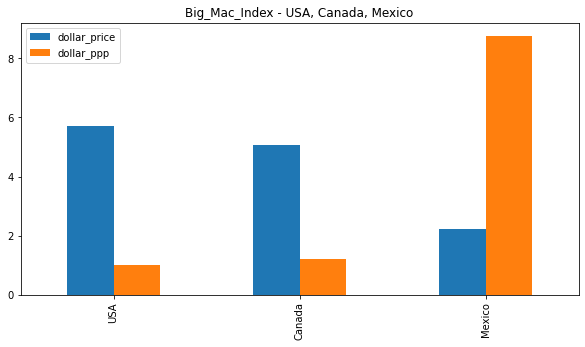

In [45]:
# Create a bar chart to analyze the Big Mac Index for the United States, 
# Canada and Mexico
# Be sure to include a title and adjust the figure size.
big_mac_index_df.plot.bar(figsize=(10,5), title='Big_Mac_Index - USA, Canada, Mexico')
